# IT5006 Group Project - FD001

## 1. Load the train data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import datetime

from scipy.stats import skew, kurtosis
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler


In [2]:
col_names = ['unit_id', 'cycle', 'sys1', 'sys2', 'sys3'] + [f"sensor{i}" for i in range(1, 22)]

train_df1 = pd.read_csv('data/train_FD001.txt', delim_whitespace=True, header=None, names=col_names)

### How the data looks like:

In [3]:
train_df1.head()

,unit_id,cycle,sys1,sys2,sys3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


## 2. Remove uninformative (near-constant) columns

By analysing all the fields using `describe` method, we can find fields 'sys3', 'sensor1', 'sensor5', 'sensor6', 'sensor10', 'sensor16', 'sensor18' and 'sensor19' are not changing much through the entire engine life, therefore we can drop them directly:

In [4]:
static_cols = ['sys3', 'sensor1', 'sensor5', 'sensor6', 'sensor10', 'sensor16', 'sensor18', 'sensor19'];
train_df1[static_cols].describe()

,sys3,sensor1,sensor5,sensor6,sensor10,sensor16,sensor18,sensor19
count,20631.0,2.063100e+04,2.063100e+04,20631.000000,2.063100e+04,2.063100e+04,20631.0,20631.0
mean,100.0,5.186700e+02,1.462000e+01,21.609803,1.300000e+00,3.000000e-02,2388.0,100.0
std,0.0,6.537152e-11,3.394700e-12,0.001389,4.660829e-13,1.556432e-14,0.0,0.0
min,100.0,5.186700e+02,1.462000e+01,21.600000,1.300000e+00,3.000000e-02,2388.0,100.0
25%,100.0,5.186700e+02,1.462000e+01,21.610000,1.300000e+00,3.000000e-02,2388.0,100.0
50%,100.0,5.186700e+02,1.462000e+01,21.610000,1.300000e+00,3.000000e-02,2388.0,100.0
75%,100.0,5.186700e+02,1.462000e+01,21.610000,1.300000e+00,3.000000e-02,2388.0,100.0
max,100.0,5.186700e+02,1.462000e+01,21.610000,1.300000e+00,3.000000e-02,2388.0,100.0


In [5]:
train_df1.drop(columns=static_cols, inplace=True)

In [6]:
train_df1

,unit_id,cycle,sys1,sys2,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640


## 3. Perform basic checks
### Find missing cycle per unit (if any)
For FD001 we don't see missing cycles in the raw data.

In [7]:
def find_missing_cycles(df):
    missing_cycles = {}
    for unit_id, group in df.groupby('unit_id'):
        actual_cycles = group['cycle'].values
        expected_cycles = list(range(1, group['cycle'].max() + 1))  # Create the expected cycle sequence
        missing = sorted(set(expected_cycles) - set(actual_cycles))  # Compare and find missing cycles
        if missing:
            missing_cycles[unit_id] = missing
    return missing_cycles

missing_cycles = find_missing_cycles(train_df1)
if (len(missing_cycles)):
    print(missing_cycles)

### Check and fill null values (if any)
For FD001 we don't see null values.

In [8]:
for col in train_df1.columns:
    if(train_df1[col].isnull().any()):
        print("Column ",col," has null value(s).")
        train_df1[col] = train_df1.groupby('unit_num')[col].transform(lambda x: x.fillna(x.mean()))
# train_df1.describe()

## 4. Add Remaining Useful Life (RUL) as target

In [9]:
train_df1['RUL'] = train_df1.groupby('unit_id')['cycle'].transform(lambda x: x.max() - x)
train_df1.head()

,unit_id,cycle,sys1,sys2,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21,RUL
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187


## 5. Visualize the data

### Crrelation heatmap

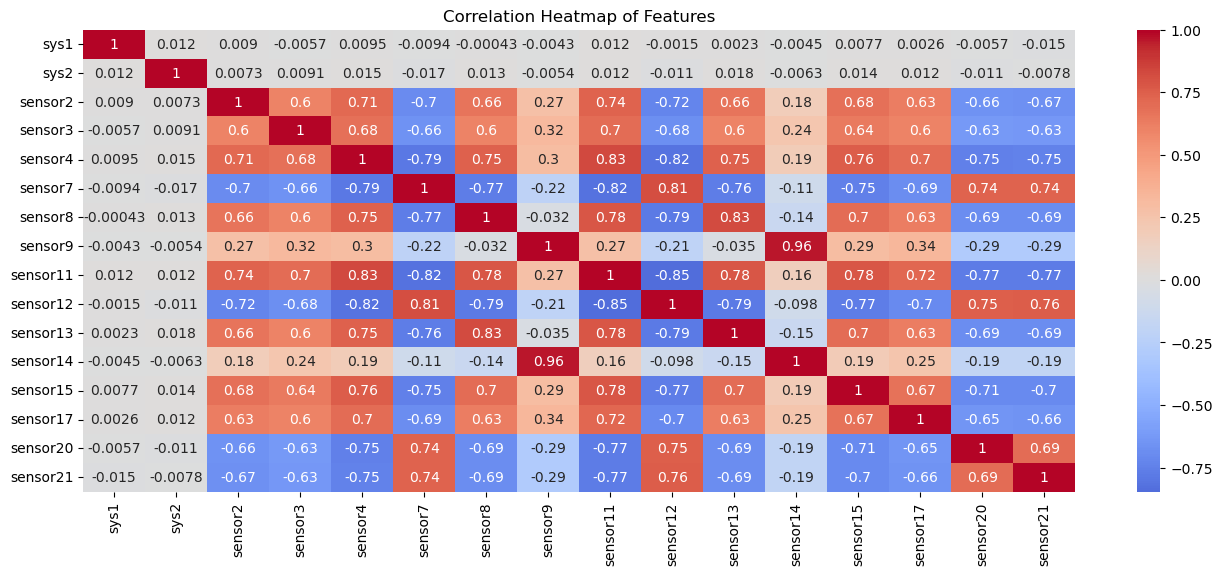

In [10]:
import seaborn as sns

cols = train_df1.columns
features_to_correlate = cols[~cols.isin(['unit_id', 'cycle', 'RUL'])]

correlation_matrix = train_df1[features_to_correlate].corr()
plt.figure(figsize=(16, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.title('Correlation Heatmap of Features')
plt.show()

### Box plot for the entire dataset

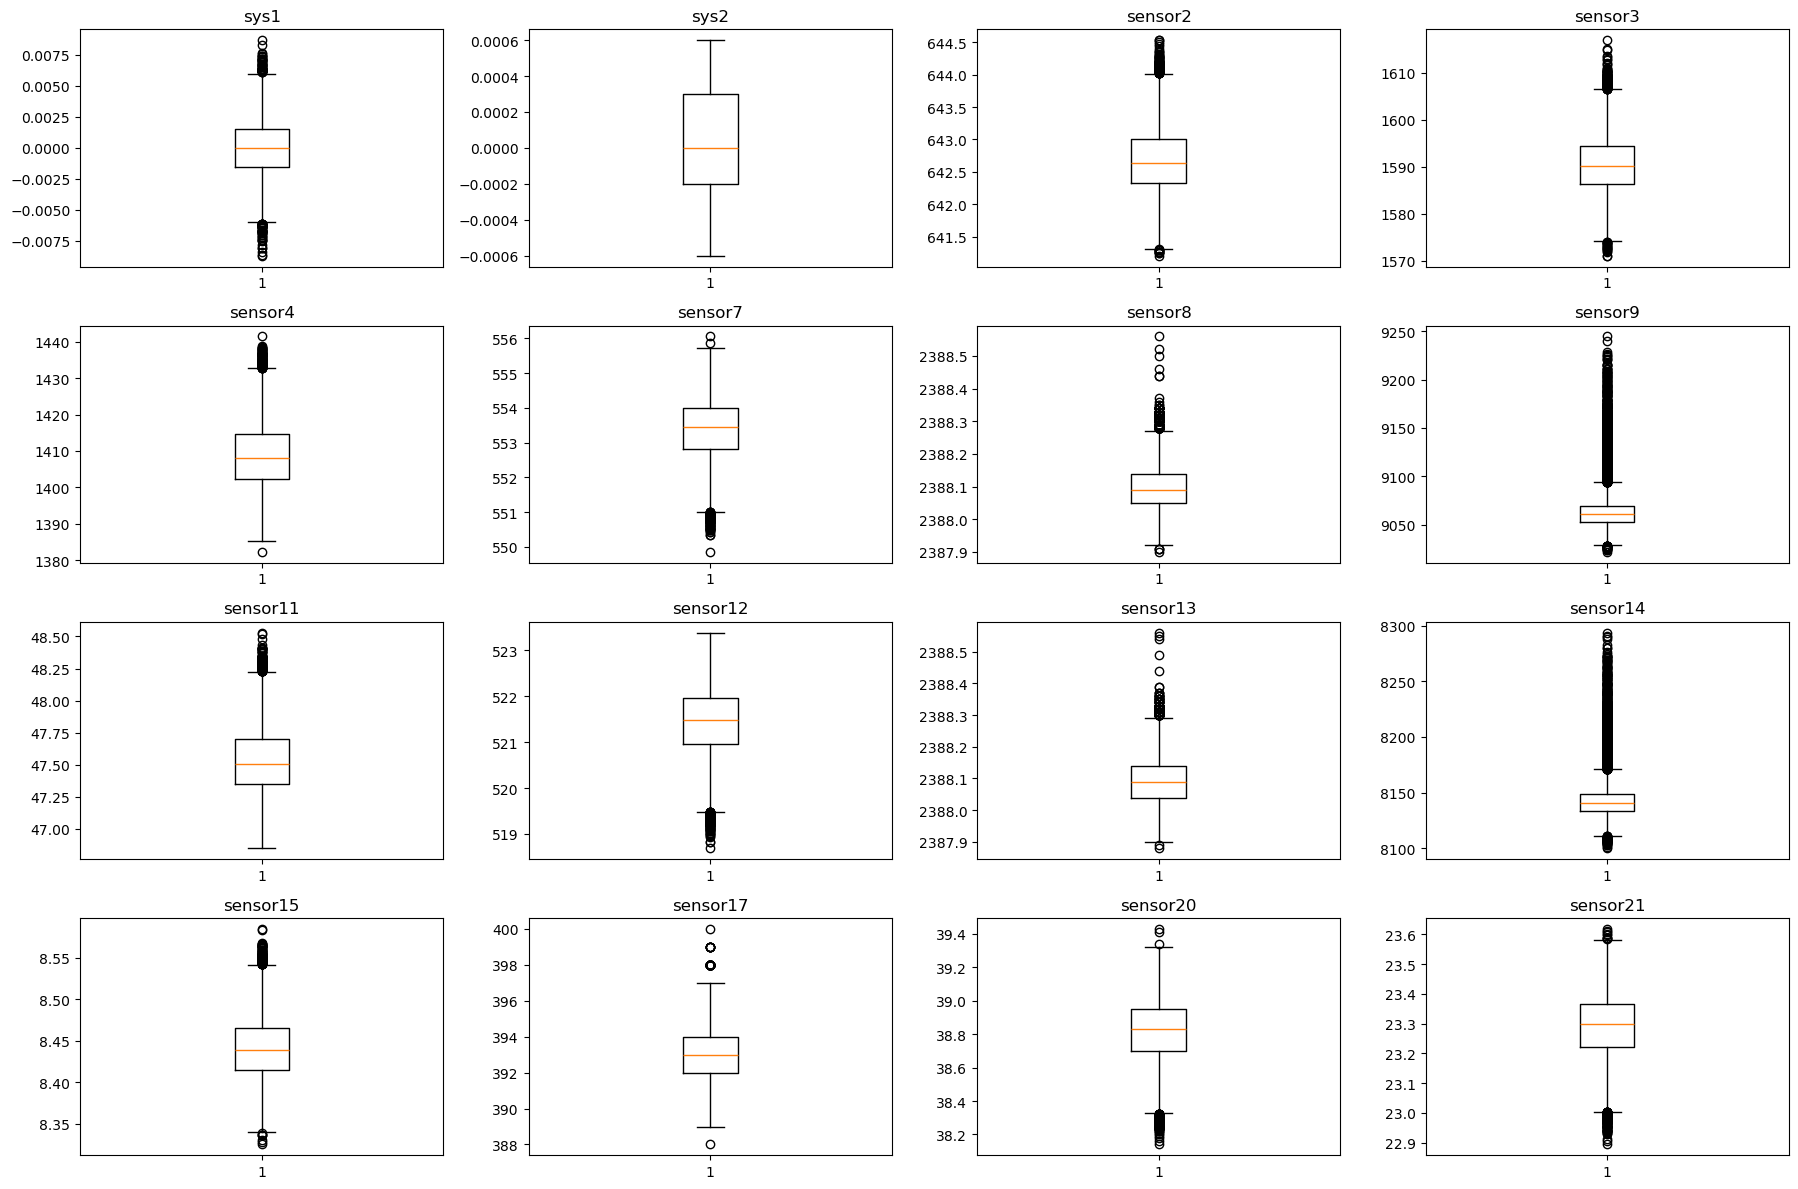

In [11]:
# Create a 4x4 grid of subplots
unit_id = 1
cols = train_df1.columns
cols = cols[~cols.isin(['unit_id', 'cycle', 'RUL'])]

fig, axes = plt.subplots(4, 4, figsize = (18, 12))
axes = axes.flatten()

for i, col in enumerate(cols):
    axes[i].boxplot(train_df1[col])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

### Box plot for one unit (unit_id = 1)
We can see that when looking into the data on single unit level, the sensor readings tend to have less outliers.

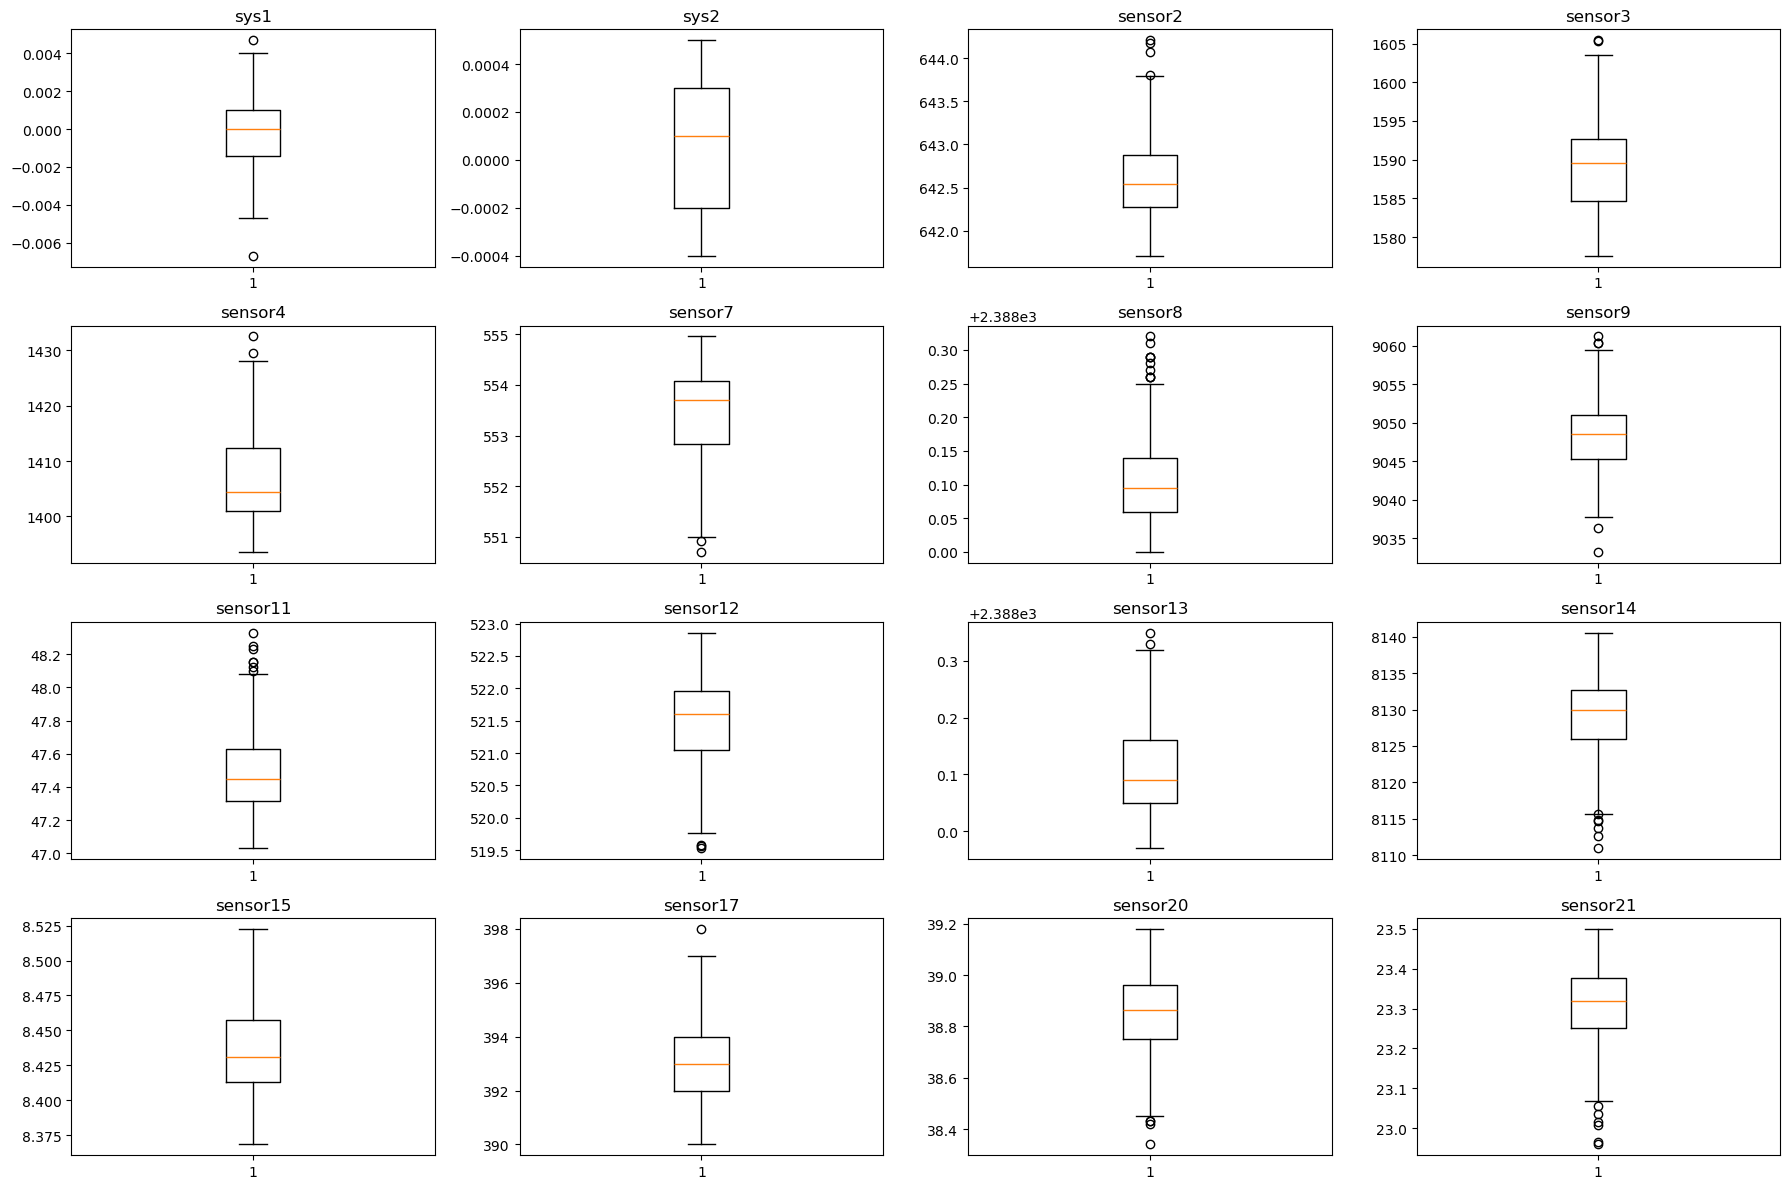

In [12]:
# Create a 4x4 grid of subplots
unit_id = 1
cols = train_df1.columns
cols = cols[~cols.isin(['unit_id', 'cycle', 'RUL'])]
unit_df = train_df1[train_df1['unit_id'] == unit_id]

fig, axes = plt.subplots(4, 4, figsize = (18, 12))
axes = axes.flatten()

for i, col in enumerate(cols):
    axes[i].boxplot(unit_df[col])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

### Line plot for one unit (unit_id = 1)
We can see the system settings data are not linearly or binomially related to the RUL.

And the swings of the sensor readings suggest it's better to apply **rolling window** to smooth the noise.

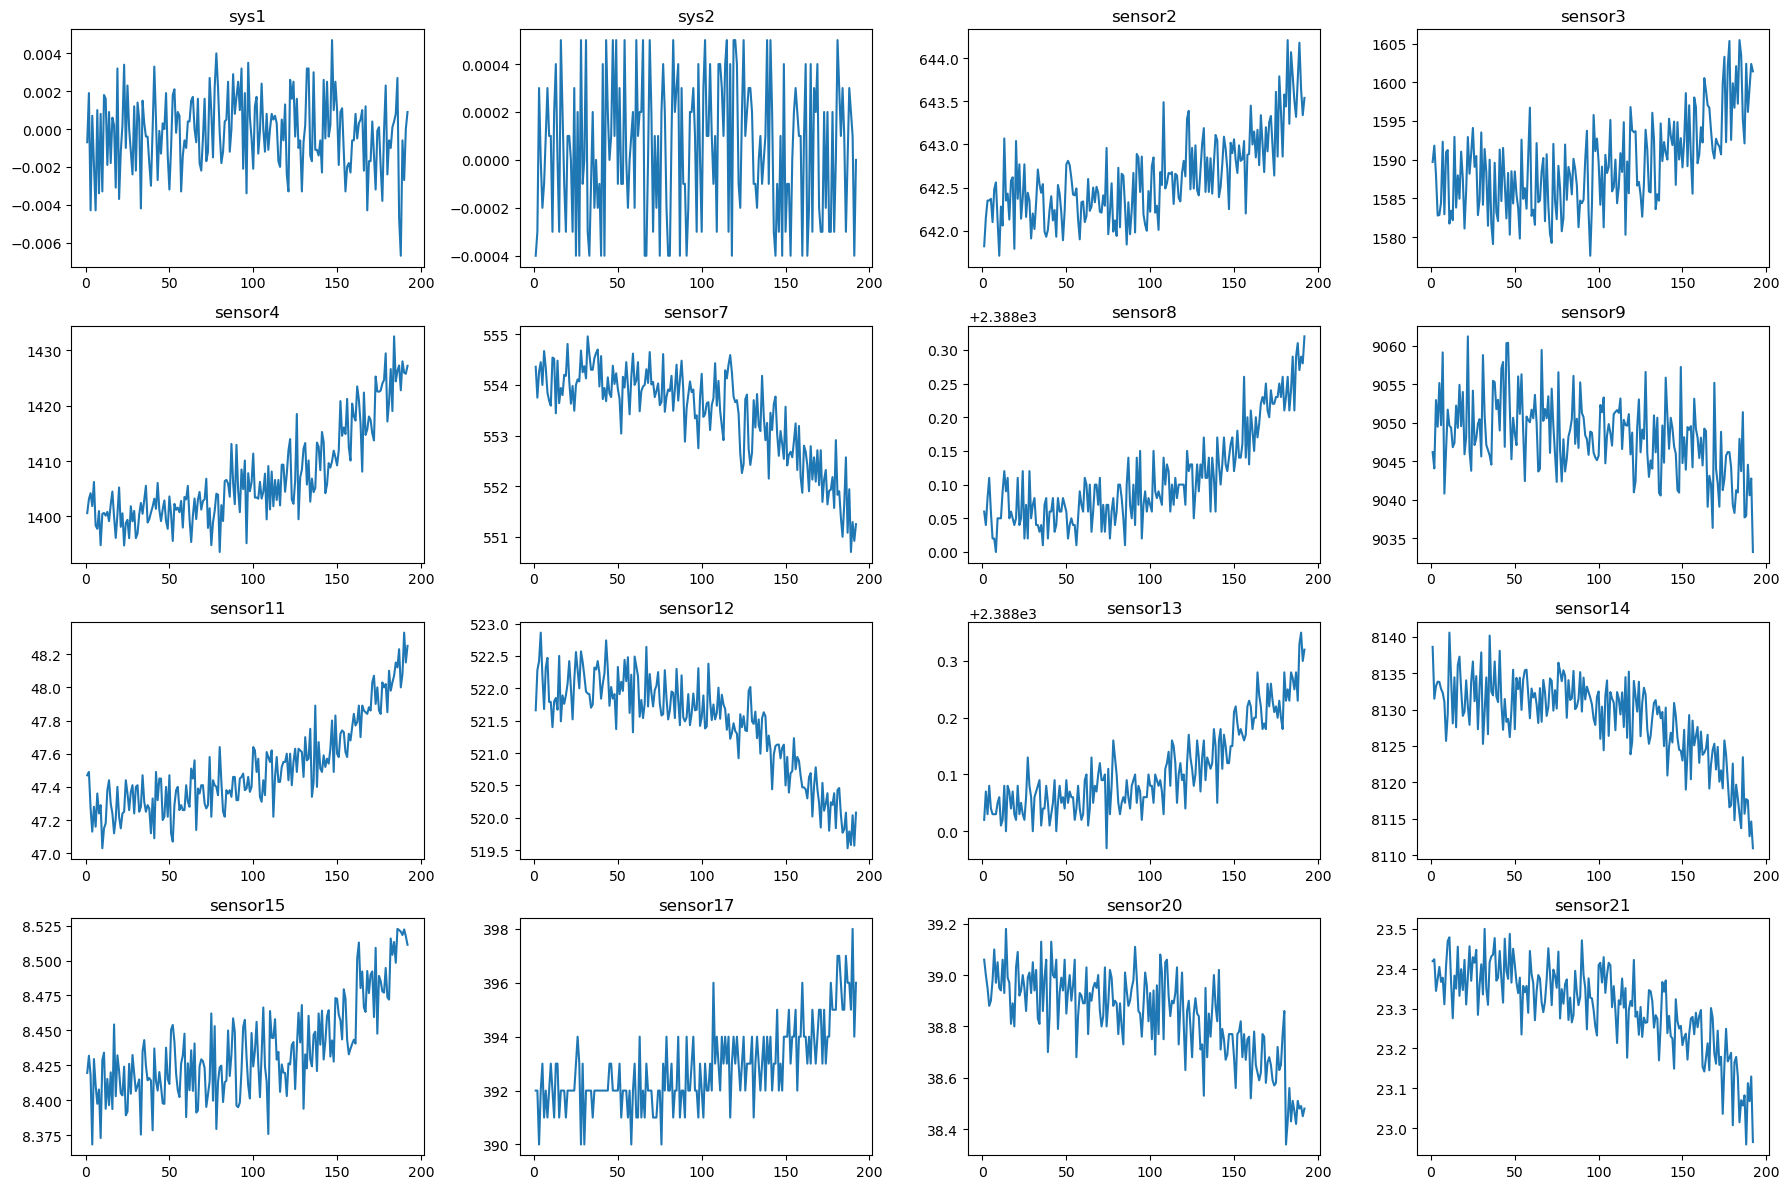

In [13]:
# Create a 4x4 grid of subplots
unit_id = 1
cols = train_df1.columns
cols = cols[~cols.isin(['unit_id', 'cycle', 'RUL'])]
unit_df = train_df1[train_df1['unit_id'] == unit_id]

fig, axes = plt.subplots(4, 4, figsize = (18, 12))
axes = axes.flatten()

for i, col in enumerate(cols):
    axes[i].plot(unit_df['cycle'], unit_df[col])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

## 6. Feature Engineering
### Create new features

In [14]:
def create_features(df, window_size):
    # Initialize new features dataframe
    features = pd.DataFrame()
    features['unit_id'] = df['unit_id']
    features['cycle'] = df['cycle']

    # 1. Static statistical features
    sensor_cols = [col for col in df.columns if col.startswith('sensor')]
    agg_dict = {col: ['mean', 'std', 'min', 'max', 'var', skew, kurtosis] for col in sensor_cols}
    statistical_features = df.groupby('unit_id').agg(agg_dict)
    statistical_features.columns = ['_static_'.join(col) for col in statistical_features.columns]
    features = features.merge(statistical_features, on='unit_id', how='left')

    # 2. Rolling statistical features (using window_size)
    rolling_window = []
    stat_functions = {
        'mean': np.mean,
        'std': np.std,
        'min': np.min,
        'max': np.max,
        'var': np.var,
        'skew': skew,
        'kurtosis': kurtosis
    }
    
    for stat_name, stat_function in stat_functions.items():
        rolling_result = df.groupby('unit_id').rolling(window=window_size, on='cycle')[sensor_cols].apply(stat_function).reset_index()
        rolling_result = rolling_result[sensor_cols]
        rolling_result.columns = [f'{col}_rolling_{stat_name}' for col in sensor_cols]
        rolling_window.append(rolling_result)
    
    rolling_window = pd.concat(rolling_window, axis=1)
    features = pd.concat([features, rolling_window], axis=1)

    # 3. Immediate diff feature
    for col in sensor_cols:
        features[f'{col}_diff'] = df.groupby('unit_id')[col].diff()

    # 4. Rolling trend features
    for col in sensor_cols:
        slopes = []
        for unit_id in df['unit_id'].unique():
            unit_data = df[df['unit_id'] == unit_id]
            for i in range(len(unit_data)):
                if i < window_size - 1:
                    slopes.append(0)
                else:
                    y = unit_data.iloc[i-window_size+1:i+1][col].values
                    x = np.array(range(window_size)).reshape(-1, 1)
                    model = LinearRegression().fit(x, y)
                    slopes.append(model.coef_[0])
        features[f'{col}_rolling_slope'] = slopes

    # 5. Lag features
    lag_values = [5, 10]
    for col in sensor_cols:
        for lag in lag_values:
            features[f'{col}_lag_{lag}'] = df.groupby('unit_id')[col].shift(lag)

    # 6. Rolling lag features
    rolling_lag_values = [5, 10]
    for col in sensor_cols:
        for lag in rolling_lag_values:
            features[f'{col}_rolling_lag_{lag}'] = df.groupby('unit_id')[col].shift(lag).rolling(window=window_size).mean()

    # 7. Ratios between sensor readings and sensor rolling means
    # Creating ratios for temperature sensors 2, 3, 4 against pressure sensors 7
    sensor_numerators = ['sensor2', 'sensor3', 'sensor4']
    sensor_denominators = ['sensor7']

    for num in sensor_numerators:
        for denom in sensor_denominators:
            features[f'tp_ratio_{num}_to_{denom}'] = df[num] / (df[denom] + 1e-6) # add a small number to avoid division by 0
            features[f'rolling_mean_ratio_{num}_to_{denom}'] = features[f'{num}_rolling_mean'] / (features[f'{denom}_rolling_mean'] + 1e-6)
                
    df_with_features = pd.concat([df, features.drop(columns=['unit_id', 'cycle']).reset_index(drop=True)], axis=1)
    return df_with_features


In [15]:
train_df1_all = create_features(train_df1, 30)

# Display the resulting features
pd.set_option('display.max_columns', None)
train_df1_all.head()

,unit_id,cycle,sys1,sys2,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21,RUL,sensor2_static_mean,sensor2_static_std,sensor2_static_min,sensor2_static_max,sensor2_static_var,sensor2_static_skew,sensor2_static_kurtosis,sensor3_static_mean,sensor3_static_std,sensor3_static_min,sensor3_static_max,sensor3_static_var,sensor3_static_skew,sensor3_static_kurtosis,sensor4_static_mean,sensor4_static_std,sensor4_static_min,sensor4_static_max,sensor4_static_var,sensor4_static_skew,sensor4_static_kurtosis,sensor7_static_mean,sensor7_static_std,sensor7_static_min,sensor7_static_max,sensor7_static_var,sensor7_static_skew,sensor7_static_kurtosis,sensor8_static_mean,sensor8_static_std,sensor8_static_min,sensor8_static_max,sensor8_static_var,sensor8_static_skew,sensor8_static_kurtosis,sensor9_static_mean,sensor9_static_std,sensor9_static_min,sensor9_static_max,sensor9_static_var,sensor9_static_skew,sensor9_static_kurtosis,sensor11_static_mean,sensor11_static_std,sensor11_static_min,sensor11_static_max,sensor11_static_var,sensor11_static_skew,sensor11_static_kurtosis,sensor12_static_mean,sensor12_static_std,sensor12_static_min,sensor12_static_max,sensor12_static_var,sensor12_static_skew,sensor12_static_kurtosis,sensor13_static_mean,sensor13_static_std,sensor13_static_min,sensor13_static_max,sensor13_static_var,sensor13_static_skew,sensor13_static_kurtosis,sensor14_static_mean,sensor14_static_std,sensor14_static_min,sensor14_static_max,sensor14_static_var,sensor14_static_skew,sensor14_static_kurtosis,sensor15_static_mean,sensor15_static_std,sensor15_static_min,sensor15_static_max,sensor15_static_var,sensor15_static_skew,sensor15_static_kurtosis,sensor17_static_mean,sensor17_static_std,sensor17_static_min,sensor17_static_max,sensor17_static_var,sensor17_static_skew,sensor17_static_kurtosis,sensor20_static_mean,sensor20_static_std,sensor20_static_min,sensor20_static_max,sensor20_static_var,sensor20_static_skew,sensor20_static_kurtosis,sensor21_static_mean,sensor21_static_std,sensor21_static_min,sensor21_static_max,sensor21_static_var,sensor21_static_skew,sensor21_static_kurtosis,sensor2_rolling_mean,sensor3_rolling_mean,sensor4_rolling_mean,sensor7_rolling_mean,sensor8_rolling_mean,sensor9_rolling_mean,sensor11_rolling_mean,sensor12_rolling_mean,sensor13_rolling_mean,sensor14_rolling_mean,sensor15_rolling_mean,sensor17_rolling_mean,sensor20_rolling_mean,sensor21_rolling_mean,sensor2_rolling_std,sensor3_rolling_std,sensor4_rolling_std,sensor7_rolling_std,sensor8_rolling_std,sensor9_rolling_std,sensor11_rolling_std,sensor12_rolling_std,sensor13_rolling_std,sensor14_rolling_std,sensor15_rolling_std,sensor17_rolling_std,sensor20_rolling_std,sensor21_rolling_std,sensor2_rolling_min,sensor3_rolling_min,sensor4_rolling_min,sensor7_rolling_min,sensor8_rolling_min,sensor9_rolling_min,sensor11_rolling_min,sensor12_rolling_min,sensor13_rolling_min,sensor14_rolling_min,sensor15_rolling_min,sensor17_rolling_min,sensor20_rolling_min,sensor21_rolling_min,sensor2_rolling_max,sensor3_rolling_max,sensor4_rolling_max,sensor7_rolling_max,sensor8_rolling_max,sensor9_rolling_max,sensor11_rolling_max,sensor12_rolling_max,sensor13_rolling_max,sensor14_rolling_max,sensor15_rolling_max,sensor17_rolling_max,sensor20_rolling_max,sensor21_rolling_max,sensor2_rolling_var,sensor3_rolling_var,sensor4_rolling_var,sensor7_rolling_var,sensor8_rolling_var,sensor9_rolling_var,sensor11_rolling_var,sensor12_rolling_var,sensor13_rolling_var,sensor14_rolling_var,sensor15_rolling_var,sensor17_rolling_var,sensor20_rolling_var,sensor21_rolling_var,sensor2_rolling_skew,sensor3_rolling_skew,sensor4_rolling_skew,sensor7_rolling_skew,sensor8_rolling_skew,sensor9_rolling_skew,sensor11_rolling_skew,sensor12_rolling_skew,sensor13_rolling_skew,sensor14_rolling_skew,sensor15_rolling_skew,sensor17_rolling_skew,sensor20_rolling_skew,sensor21_rolling_skew,sensor2_rolling_kurtosis,sensor3_rolling_kurtosis,sensor4_rolling_kurtosis,sens

### Pre-processing all features

In [16]:
# Handle missing values by replacing infinite values and dropping NaNs
train_df1_all = train_df1_all.replace([np.inf, -np.inf], np.nan).dropna()
train_df1_all = train_df1_all.apply(pd.to_numeric, errors='coerce').dropna()

train_df1_features = train_df1_all.drop(columns=['unit_id','cycle','RUL'])
train_df1_seq = train_df1_all[['unit_id','cycle']]
train_df1_target = train_df1_all['RUL']

# Min-Max scaling
scaler = MinMaxScaler()
scaler.fit(train_df1_features)

train_df1_features_scaled = pd.DataFrame(scaler.fit_transform(train_df1_features), columns=train_df1_features.columns, index=train_df1_features.index)
train_df1_scaled = pd.concat([train_df1_seq, train_df1_features_scaled, train_df1_target], axis=1)

train_df1_scaled.describe()

,unit_id,cycle,sys1,sys2,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21,sensor2_static_mean,sensor2_static_std,sensor2_static_min,sensor2_static_max,sensor2_static_var,sensor2_static_skew,sensor2_static_kurtosis,sensor3_static_mean,sensor3_static_std,sensor3_static_min,sensor3_static_max,sensor3_static_var,sensor3_static_skew,sensor3_static_kurtosis,sensor4_static_mean,sensor4_static_std,sensor4_static_min,sensor4_static_max,sensor4_static_var,sensor4_static_skew,sensor4_static_kurtosis,sensor7_static_mean,sensor7_static_std,sensor7_static_min,sensor7_static_max,sensor7_static_var,sensor7_static_skew,sensor7_static_kurtosis,sensor8_static_mean,sensor8_static_std,sensor8_static_min,sensor8_static_max,sensor8_static_var,sensor8_static_skew,sensor8_static_kurtosis,sensor9_static_mean,sensor9_static_std,sensor9_static_min,sensor9_static_max,sensor9_static_var,sensor9_static_skew,sensor9_static_kurtosis,sensor11_static_mean,sensor11_static_std,sensor11_static_min,sensor11_static_max,sensor11_static_var,sensor11_static_skew,sensor11_static_kurtosis,sensor12_static_mean,sensor12_static_std,sensor12_static_min,sensor12_static_max,sensor12_static_var,sensor12_static_skew,sensor12_static_kurtosis,sensor13_static_mean,sensor13_static_std,sensor13_static_min,sensor13_static_max,sensor13_static_var,sensor13_static_skew,sensor13_static_kurtosis,sensor14_static_mean,sensor14_static_std,sensor14_static_min,sensor14_static_max,sensor14_static_var,sensor14_static_skew,sensor14_static_kurtosis,sensor15_static_mean,sensor15_static_std,sensor15_static_min,sensor15_static_max,sensor15_static_var,sensor15_static_skew,sensor15_static_kurtosis,sensor17_static_mean,sensor17_static_std,sensor17_static_min,sensor17_static_max,sensor17_static_var,sensor17_static_skew,sensor17_static_kurtosis,sensor20_static_mean,sensor20_static_std,sensor20_static_min,sensor20_static_max,sensor20_static_var,sensor20_static_skew,sensor20_static_kurtosis,sensor21_static_mean,sensor21_static_std,sensor21_static_min,sensor21_static_max,sensor21_static_var,sensor21_static_skew,sensor21_static_kurtosis,sensor2_rolling_mean,sensor3_rolling_mean,sensor4_rolling_mean,sensor7_rolling_mean,sensor8_rolling_mean,sensor9_rolling_mean,sensor11_rolling_mean,sensor12_rolling_mean,sensor13_rolling_mean,sensor14_rolling_mean,sensor15_rolling_mean,sensor17_rolling_mean,sensor20_rolling_mean,sensor21_rolling_mean,sensor2_rolling_std,sensor3_rolling_std,sensor4_rolling_std,sensor7_rolling_std,sensor8_rolling_std,sensor9_rolling_std,sensor11_rolling_std,sensor12_rolling_std,sensor13_rolling_std,sensor14_rolling_std,sensor15_rolling_std,sensor17_rolling_std,sensor20_rolling_std,sensor21_rolling_std,sensor2_rolling_min,sensor3_rolling_min,sensor4_rolling_min,sensor7_rolling_min,sensor8_rolling_min,sensor9_rolling_min,sensor11_rolling_min,sensor12_rolling_min,sensor13_rolling_min,sensor14_rolling_min,sensor15_rolling_min,sensor17_rolling_min,sensor20_rolling_min,sensor21_rolling_min,sensor2_rolling_max,sensor3_rolling_max,sensor4_rolling_max,sensor7_rolling_max,sensor8_rolling_max,sensor9_rolling_max,sensor11_rolling_max,sensor12_rolling_max,sensor13_rolling_max,sensor14_rolling_max,sensor15_rolling_max,sensor17_rolling_max,sensor20_rolling_max,sensor21_rolling_max,sensor2_rolling_var,sensor3_rolling_var,sensor4_rolling_var,sensor7_rolling_var,sensor8_rolling_var,sensor9_rolling_var,sensor11_rolling_var,sensor12_rolling_var,sensor13_rolling_var,sensor14_rolling_var,sensor15_rolling_var,sensor17_rolling_var,sensor20_rolling_var,sensor21_rolling_var,sensor2_rolling_skew,sensor3_rolling_skew,sensor4_rolling_skew,sensor7_rolling_skew,sensor8_rolling_skew,sensor9_rolling_skew,sensor11_rolling_skew,sensor12_rolling_skew,sensor13_rolling_skew,sensor14_rolling_skew,sensor15_rolling_skew,sensor17_rolling_skew,sensor20_rolling_skew,sensor21_rolling_skew,sensor2_rolling_kurtosis,sensor3_rolling_kurtosis,sensor4_rolling_kurtosis,sensor7_

Note that in the above summary, we see min cycle of 40 and max cycle of 362, as well as the max RUL of 322. This is because we have rolling window of 30 and rolling lag of 10 created. So 362 - 30 - 10 = 322.

## 7. Apply the same steps to test data set
### Prepare X_test (test_FD001.txt)

In [17]:
col_names = ['unit_id', 'cycle', 'sys1', 'sys2', 'sys3'] + [f"sensor{i}" for i in range(1, 22)]

test_df1 = pd.read_csv('data/test_FD001.txt', delim_whitespace=True, header=None, names=col_names)
test_df1.drop(columns=static_cols, inplace=True)

test_df1_all = create_features(test_df1, 30)

In [18]:
test_df1_all = test_df1_all.replace([np.inf, -np.inf], np.nan).dropna()
test_df1_all = test_df1_all.apply(pd.to_numeric, errors='coerce').dropna()

test_df1_features = test_df1_all.drop(columns=['unit_id','cycle'])
test_df1_seq = test_df1_all[['unit_id','cycle']]

# Reuse the min-max scaler fitted using training data to scale the test data
test_df1_features_scaled = pd.DataFrame(scaler.fit_transform(test_df1_features), columns=test_df1_features.columns, index=test_df1_features.index)
test_df1_scaled = pd.concat([test_df1_seq, test_df1_features_scaled], axis=1)

# This is our X_test
test_df1_scaled.describe()

,unit_id,cycle,sys1,sys2,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21,sensor2_static_mean,sensor2_static_std,sensor2_static_min,sensor2_static_max,sensor2_static_var,sensor2_static_skew,sensor2_static_kurtosis,sensor3_static_mean,sensor3_static_std,sensor3_static_min,sensor3_static_max,sensor3_static_var,sensor3_static_skew,sensor3_static_kurtosis,sensor4_static_mean,sensor4_static_std,sensor4_static_min,sensor4_static_max,sensor4_static_var,sensor4_static_skew,sensor4_static_kurtosis,sensor7_static_mean,sensor7_static_std,sensor7_static_min,sensor7_static_max,sensor7_static_var,sensor7_static_skew,sensor7_static_kurtosis,sensor8_static_mean,sensor8_static_std,sensor8_static_min,sensor8_static_max,sensor8_static_var,sensor8_static_skew,sensor8_static_kurtosis,sensor9_static_mean,sensor9_static_std,sensor9_static_min,sensor9_static_max,sensor9_static_var,sensor9_static_skew,sensor9_static_kurtosis,sensor11_static_mean,sensor11_static_std,sensor11_static_min,sensor11_static_max,sensor11_static_var,sensor11_static_skew,sensor11_static_kurtosis,sensor12_static_mean,sensor12_static_std,sensor12_static_min,sensor12_static_max,sensor12_static_var,sensor12_static_skew,sensor12_static_kurtosis,sensor13_static_mean,sensor13_static_std,sensor13_static_min,sensor13_static_max,sensor13_static_var,sensor13_static_skew,sensor13_static_kurtosis,sensor14_static_mean,sensor14_static_std,sensor14_static_min,sensor14_static_max,sensor14_static_var,sensor14_static_skew,sensor14_static_kurtosis,sensor15_static_mean,sensor15_static_std,sensor15_static_min,sensor15_static_max,sensor15_static_var,sensor15_static_skew,sensor15_static_kurtosis,sensor17_static_mean,sensor17_static_std,sensor17_static_min,sensor17_static_max,sensor17_static_var,sensor17_static_skew,sensor17_static_kurtosis,sensor20_static_mean,sensor20_static_std,sensor20_static_min,sensor20_static_max,sensor20_static_var,sensor20_static_skew,sensor20_static_kurtosis,sensor21_static_mean,sensor21_static_std,sensor21_static_min,sensor21_static_max,sensor21_static_var,sensor21_static_skew,sensor21_static_kurtosis,sensor2_rolling_mean,sensor3_rolling_mean,sensor4_rolling_mean,sensor7_rolling_mean,sensor8_rolling_mean,sensor9_rolling_mean,sensor11_rolling_mean,sensor12_rolling_mean,sensor13_rolling_mean,sensor14_rolling_mean,sensor15_rolling_mean,sensor17_rolling_mean,sensor20_rolling_mean,sensor21_rolling_mean,sensor2_rolling_std,sensor3_rolling_std,sensor4_rolling_std,sensor7_rolling_std,sensor8_rolling_std,sensor9_rolling_std,sensor11_rolling_std,sensor12_rolling_std,sensor13_rolling_std,sensor14_rolling_std,sensor15_rolling_std,sensor17_rolling_std,sensor20_rolling_std,sensor21_rolling_std,sensor2_rolling_min,sensor3_rolling_min,sensor4_rolling_min,sensor7_rolling_min,sensor8_rolling_min,sensor9_rolling_min,sensor11_rolling_min,sensor12_rolling_min,sensor13_rolling_min,sensor14_rolling_min,sensor15_rolling_min,sensor17_rolling_min,sensor20_rolling_min,sensor21_rolling_min,sensor2_rolling_max,sensor3_rolling_max,sensor4_rolling_max,sensor7_rolling_max,sensor8_rolling_max,sensor9_rolling_max,sensor11_rolling_max,sensor12_rolling_max,sensor13_rolling_max,sensor14_rolling_max,sensor15_rolling_max,sensor17_rolling_max,sensor20_rolling_max,sensor21_rolling_max,sensor2_rolling_var,sensor3_rolling_var,sensor4_rolling_var,sensor7_rolling_var,sensor8_rolling_var,sensor9_rolling_var,sensor11_rolling_var,sensor12_rolling_var,sensor13_rolling_var,sensor14_rolling_var,sensor15_rolling_var,sensor17_rolling_var,sensor20_rolling_var,sensor21_rolling_var,sensor2_rolling_skew,sensor3_rolling_skew,sensor4_rolling_skew,sensor7_rolling_skew,sensor8_rolling_skew,sensor9_rolling_skew,sensor11_rolling_skew,sensor12_rolling_skew,sensor13_rolling_skew,sensor14_rolling_skew,sensor15_rolling_skew,sensor17_rolling_skew,sensor20_rolling_skew,sensor21_rolling_skew,sensor2_rolling_kurtosis,sensor3_rolling_kurtosis,sensor4_rolling_kurtosis,sensor7_

 ### Prepare y_test (RUL_FD001.txt)

In [48]:
RUL_df1 = pd.read_csv('data/RUL_FD001.txt', delim_whitespace=True, header=None, names=['RUL'])
RUL_df1['unit_id'] = range(1, len(RUL_df1) + 1)

## 8. Build ramdom forest model using all features

In [57]:
from sklearn.model_selection import train_test_split,GridSearchCV,TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

def fit_rf_model(X, y, param_grid):
    # Set up TimeSeriesSplit for time-series cross-validation
    tscv = TimeSeriesSplit(n_splits=3)
    
    # Initialize Random Forest Regressor
    rf_model = RandomForestRegressor(random_state=42)
    
    # Perform Grid Search
    grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=tscv, n_jobs=-1, verbose=2)
    grid_search.fit(X, y)
    return grid_search

def plot_feature_importances(model, cols, n):
    feature_importance = model.feature_importances_
    indices = np.argsort(feature_importance)[::-1][:n]

    top_features = feature_importance[indices]
    top_feature_names = cols[indices]

    plt.figure(figsize=(8, 4))
    plt.title(f"Top {n} Feature Importances")
    plt.barh(top_feature_names, top_features, color="blue", align="center")
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature Name")
    plt.gca().invert_yaxis()
    plt.show()


### Evaluate model and plot feature importances

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 200}
Root Mean Squared Error (RMSE): 31.291344832219814


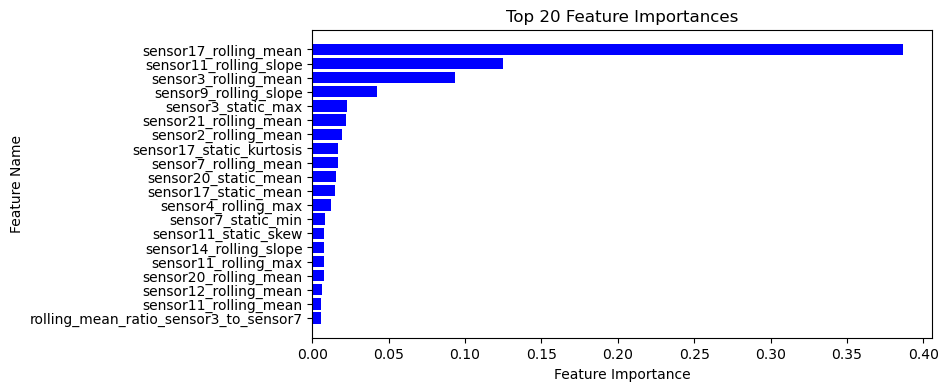

In [58]:
# Select features and target
X_train = train_df1_scaled.drop(columns=['RUL', 'unit_id', 'cycle'])
y_train = train_df1_scaled['RUL'] # Note: RUL is not scaled
X_test = test_df1_scaled.drop(columns=['unit_id', 'cycle'])
y_test = RUL_df1['RUL']

# Set up the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [6, 7, 8],
    'min_samples_split': [3, 4, 5],
    'min_samples_leaf': [2, 3, 4]
}

grid_search_rf = fit_rf_model(X_train, y_train, param_grid)

# Best parameters
print(f'Best Parameters: {grid_search_rf.best_params_}')

# Make predictions
best_rf_model = grid_search_rf.best_estimator_
y_pred = best_rf_model.predict(X_test)
y_pred_df = pd.DataFrame({'unit_id': test_df1_scaled['unit_id'].values, 'RUL_pred': y_pred}).groupby('unit_id').tail(1)
res_df1 = pd.merge(y_pred_df, RUL_df1, on='unit_id', how='left')

mse = mean_squared_error(res_df1['RUL'], res_df1['RUL_pred'])
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

plot_feature_importances(best_rf_model, X_train.columns, 20)

From above we can see most important features are rolling features. So we can try fit a new model with only rolling features.
## 9. Build ramdom forest model using rolling features

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 100}
Root Mean Squared Error (RMSE): 29.89659988965917


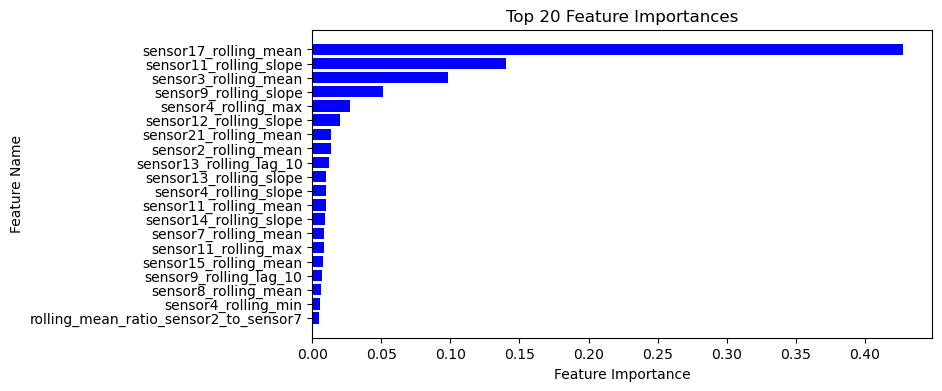

In [60]:
# Select features and target
# Reuse y_train and y_test
X_train_rolling = train_df1_scaled.filter(like='rolling')
X_test_rolling = test_df1_scaled.filter(like='rolling')

# Set up the parameter grid for Grid Search
param_grid_rolling = {
    'n_estimators': [50, 100, 200],
    'max_depth': [6, 7, 8],
    'min_samples_split': [3, 4, 5],
    'min_samples_leaf': [2, 3, 4]
}

grid_search_rf = fit_rf_model(X_train_rolling, y_train, param_grid_rolling)

# Best parameters
print(f'Best Parameters: {grid_search_rf.best_params_}')

# Make predictions
best_rf_model = grid_search_rf.best_estimator_
y_pred = best_rf_model.predict(X_test_rolling)
y_pred_df = pd.DataFrame({'unit_id': test_df1_scaled['unit_id'].values, 'RUL_pred': y_pred}).groupby('unit_id').tail(1)
res_df1_rolling = pd.merge(y_pred_df, RUL_df1, on='unit_id', how='left')

mse = mean_squared_error(res_df1_rolling['RUL'], res_df1_rolling['RUL_pred'])
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

plot_feature_importances(best_rf_model, X_train_rolling.columns, 20)

## 10. Try Random Forest with rolling features and window size of 40

In [78]:
train_df1_all_40 = create_features(train_df1, 40)
# Handle missing values by replacing infinite values and dropping NaNs
train_df1_all_40 = train_df1_all_40.replace([np.inf, -np.inf], np.nan).dropna()
train_df1_all_40 = train_df1_all_40.apply(pd.to_numeric, errors='coerce').dropna()

train_df1_40_features = train_df1_all_40.drop(columns=['unit_id','cycle','RUL'])
train_df1_40_seq = train_df1_all_40[['unit_id','cycle']]
train_df1_40_target = train_df1_all_40['RUL']

# Min-Max scaling
scaler = MinMaxScaler()
scaler.fit(train_df1_40_features)

train_df1_40_features_scaled = pd.DataFrame(scaler.fit_transform(train_df1_40_features), columns=train_df1_40_features.columns, index=train_df1_40_features.index)
train_df1_40_scaled = pd.concat([train_df1_40_seq, train_df1_40_features_scaled, train_df1_40_target], axis=1)

train_df1_40_scaled.describe()

,unit_id,cycle,sys1,sys2,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21,sensor2_static_mean,sensor2_static_std,sensor2_static_min,sensor2_static_max,sensor2_static_var,sensor2_static_skew,sensor2_static_kurtosis,sensor3_static_mean,sensor3_static_std,sensor3_static_min,sensor3_static_max,sensor3_static_var,sensor3_static_skew,sensor3_static_kurtosis,sensor4_static_mean,sensor4_static_std,sensor4_static_min,sensor4_static_max,sensor4_static_var,sensor4_static_skew,sensor4_static_kurtosis,sensor7_static_mean,sensor7_static_std,sensor7_static_min,sensor7_static_max,sensor7_static_var,sensor7_static_skew,sensor7_static_kurtosis,sensor8_static_mean,sensor8_static_std,sensor8_static_min,sensor8_static_max,sensor8_static_var,sensor8_static_skew,sensor8_static_kurtosis,sensor9_static_mean,sensor9_static_std,sensor9_static_min,sensor9_static_max,sensor9_static_var,sensor9_static_skew,sensor9_static_kurtosis,sensor11_static_mean,sensor11_static_std,sensor11_static_min,sensor11_static_max,sensor11_static_var,sensor11_static_skew,sensor11_static_kurtosis,sensor12_static_mean,sensor12_static_std,sensor12_static_min,sensor12_static_max,sensor12_static_var,sensor12_static_skew,sensor12_static_kurtosis,sensor13_static_mean,sensor13_static_std,sensor13_static_min,sensor13_static_max,sensor13_static_var,sensor13_static_skew,sensor13_static_kurtosis,sensor14_static_mean,sensor14_static_std,sensor14_static_min,sensor14_static_max,sensor14_static_var,sensor14_static_skew,sensor14_static_kurtosis,sensor15_static_mean,sensor15_static_std,sensor15_static_min,sensor15_static_max,sensor15_static_var,sensor15_static_skew,sensor15_static_kurtosis,sensor17_static_mean,sensor17_static_std,sensor17_static_min,sensor17_static_max,sensor17_static_var,sensor17_static_skew,sensor17_static_kurtosis,sensor20_static_mean,sensor20_static_std,sensor20_static_min,sensor20_static_max,sensor20_static_var,sensor20_static_skew,sensor20_static_kurtosis,sensor21_static_mean,sensor21_static_std,sensor21_static_min,sensor21_static_max,sensor21_static_var,sensor21_static_skew,sensor21_static_kurtosis,sensor2_rolling_mean,sensor3_rolling_mean,sensor4_rolling_mean,sensor7_rolling_mean,sensor8_rolling_mean,sensor9_rolling_mean,sensor11_rolling_mean,sensor12_rolling_mean,sensor13_rolling_mean,sensor14_rolling_mean,sensor15_rolling_mean,sensor17_rolling_mean,sensor20_rolling_mean,sensor21_rolling_mean,sensor2_rolling_std,sensor3_rolling_std,sensor4_rolling_std,sensor7_rolling_std,sensor8_rolling_std,sensor9_rolling_std,sensor11_rolling_std,sensor12_rolling_std,sensor13_rolling_std,sensor14_rolling_std,sensor15_rolling_std,sensor17_rolling_std,sensor20_rolling_std,sensor21_rolling_std,sensor2_rolling_min,sensor3_rolling_min,sensor4_rolling_min,sensor7_rolling_min,sensor8_rolling_min,sensor9_rolling_min,sensor11_rolling_min,sensor12_rolling_min,sensor13_rolling_min,sensor14_rolling_min,sensor15_rolling_min,sensor17_rolling_min,sensor20_rolling_min,sensor21_rolling_min,sensor2_rolling_max,sensor3_rolling_max,sensor4_rolling_max,sensor7_rolling_max,sensor8_rolling_max,sensor9_rolling_max,sensor11_rolling_max,sensor12_rolling_max,sensor13_rolling_max,sensor14_rolling_max,sensor15_rolling_max,sensor17_rolling_max,sensor20_rolling_max,sensor21_rolling_max,sensor2_rolling_var,sensor3_rolling_var,sensor4_rolling_var,sensor7_rolling_var,sensor8_rolling_var,sensor9_rolling_var,sensor11_rolling_var,sensor12_rolling_var,sensor13_rolling_var,sensor14_rolling_var,sensor15_rolling_var,sensor17_rolling_var,sensor20_rolling_var,sensor21_rolling_var,sensor2_rolling_skew,sensor3_rolling_skew,sensor4_rolling_skew,sensor7_rolling_skew,sensor8_rolling_skew,sensor9_rolling_skew,sensor11_rolling_skew,sensor12_rolling_skew,sensor13_rolling_skew,sensor14_rolling_skew,sensor15_rolling_skew,sensor17_rolling_skew,sensor20_rolling_skew,sensor21_rolling_skew,sensor2_rolling_kurtosis,sensor3_rolling_kurtosis,sensor4_rolling_kurtosis,sensor7_

In [80]:
test_df1_40_all = create_features(test_df1, 40)
test_df1_40_all = test_df1_40_all.replace([np.inf, -np.inf], np.nan).dropna()
test_df1_40_all = test_df1_40_all.apply(pd.to_numeric, errors='coerce').dropna()

test_df1_40_features = test_df1_40_all.drop(columns=['unit_id','cycle'])
test_df1_40_seq = test_df1_40_all[['unit_id','cycle']]

# Reuse the min-max scaler fitted using training data to scale the test data
test_df1_40_features_scaled = pd.DataFrame(scaler.fit_transform(test_df1_40_features), columns=test_df1_40_features.columns, index=test_df1_40_features.index)
test_df1_40_scaled = pd.concat([test_df1_40_seq, test_df1_40_features_scaled], axis=1)

# This is our X_test
test_df1_40_scaled.describe()

,unit_id,cycle,sys1,sys2,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21,sensor2_static_mean,sensor2_static_std,sensor2_static_min,sensor2_static_max,sensor2_static_var,sensor2_static_skew,sensor2_static_kurtosis,sensor3_static_mean,sensor3_static_std,sensor3_static_min,sensor3_static_max,sensor3_static_var,sensor3_static_skew,sensor3_static_kurtosis,sensor4_static_mean,sensor4_static_std,sensor4_static_min,sensor4_static_max,sensor4_static_var,sensor4_static_skew,sensor4_static_kurtosis,sensor7_static_mean,sensor7_static_std,sensor7_static_min,sensor7_static_max,sensor7_static_var,sensor7_static_skew,sensor7_static_kurtosis,sensor8_static_mean,sensor8_static_std,sensor8_static_min,sensor8_static_max,sensor8_static_var,sensor8_static_skew,sensor8_static_kurtosis,sensor9_static_mean,sensor9_static_std,sensor9_static_min,sensor9_static_max,sensor9_static_var,sensor9_static_skew,sensor9_static_kurtosis,sensor11_static_mean,sensor11_static_std,sensor11_static_min,sensor11_static_max,sensor11_static_var,sensor11_static_skew,sensor11_static_kurtosis,sensor12_static_mean,sensor12_static_std,sensor12_static_min,sensor12_static_max,sensor12_static_var,sensor12_static_skew,sensor12_static_kurtosis,sensor13_static_mean,sensor13_static_std,sensor13_static_min,sensor13_static_max,sensor13_static_var,sensor13_static_skew,sensor13_static_kurtosis,sensor14_static_mean,sensor14_static_std,sensor14_static_min,sensor14_static_max,sensor14_static_var,sensor14_static_skew,sensor14_static_kurtosis,sensor15_static_mean,sensor15_static_std,sensor15_static_min,sensor15_static_max,sensor15_static_var,sensor15_static_skew,sensor15_static_kurtosis,sensor17_static_mean,sensor17_static_std,sensor17_static_min,sensor17_static_max,sensor17_static_var,sensor17_static_skew,sensor17_static_kurtosis,sensor20_static_mean,sensor20_static_std,sensor20_static_min,sensor20_static_max,sensor20_static_var,sensor20_static_skew,sensor20_static_kurtosis,sensor21_static_mean,sensor21_static_std,sensor21_static_min,sensor21_static_max,sensor21_static_var,sensor21_static_skew,sensor21_static_kurtosis,sensor2_rolling_mean,sensor3_rolling_mean,sensor4_rolling_mean,sensor7_rolling_mean,sensor8_rolling_mean,sensor9_rolling_mean,sensor11_rolling_mean,sensor12_rolling_mean,sensor13_rolling_mean,sensor14_rolling_mean,sensor15_rolling_mean,sensor17_rolling_mean,sensor20_rolling_mean,sensor21_rolling_mean,sensor2_rolling_std,sensor3_rolling_std,sensor4_rolling_std,sensor7_rolling_std,sensor8_rolling_std,sensor9_rolling_std,sensor11_rolling_std,sensor12_rolling_std,sensor13_rolling_std,sensor14_rolling_std,sensor15_rolling_std,sensor17_rolling_std,sensor20_rolling_std,sensor21_rolling_std,sensor2_rolling_min,sensor3_rolling_min,sensor4_rolling_min,sensor7_rolling_min,sensor8_rolling_min,sensor9_rolling_min,sensor11_rolling_min,sensor12_rolling_min,sensor13_rolling_min,sensor14_rolling_min,sensor15_rolling_min,sensor17_rolling_min,sensor20_rolling_min,sensor21_rolling_min,sensor2_rolling_max,sensor3_rolling_max,sensor4_rolling_max,sensor7_rolling_max,sensor8_rolling_max,sensor9_rolling_max,sensor11_rolling_max,sensor12_rolling_max,sensor13_rolling_max,sensor14_rolling_max,sensor15_rolling_max,sensor17_rolling_max,sensor20_rolling_max,sensor21_rolling_max,sensor2_rolling_var,sensor3_rolling_var,sensor4_rolling_var,sensor7_rolling_var,sensor8_rolling_var,sensor9_rolling_var,sensor11_rolling_var,sensor12_rolling_var,sensor13_rolling_var,sensor14_rolling_var,sensor15_rolling_var,sensor17_rolling_var,sensor20_rolling_var,sensor21_rolling_var,sensor2_rolling_skew,sensor3_rolling_skew,sensor4_rolling_skew,sensor7_rolling_skew,sensor8_rolling_skew,sensor9_rolling_skew,sensor11_rolling_skew,sensor12_rolling_skew,sensor13_rolling_skew,sensor14_rolling_skew,sensor15_rolling_skew,sensor17_rolling_skew,sensor20_rolling_skew,sensor21_rolling_skew,sensor2_rolling_kurtosis,sensor3_rolling_kurtosis,sensor4_rolling_kurtosis,sensor7_

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 50}
Root Mean Squared Error (RMSE): 31.378475756524352


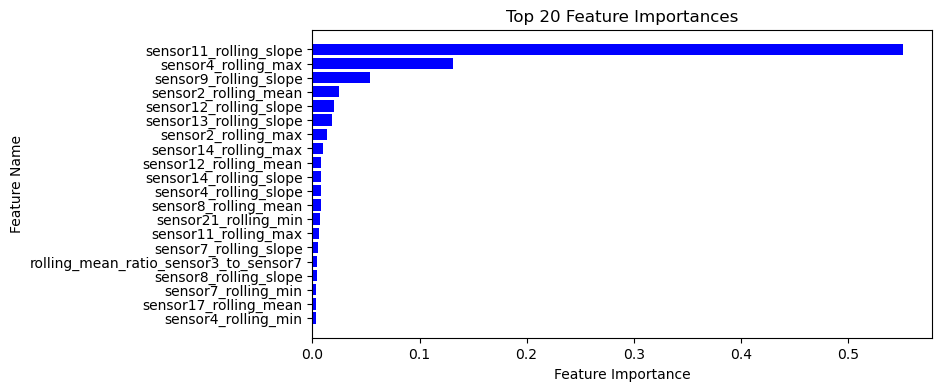

In [81]:
# Select features and target
X_train_40_rolling = train_df1_40_scaled.filter(like='rolling')
y_train = train_df1_40_scaled['RUL']
X_test_40_rolling = test_df1_40_scaled.filter(like='rolling')

# Set up the parameter grid for Grid Search
param_grid_rolling = {
    'n_estimators': [50, 100, 200],
    'max_depth': [6, 7, 8],
    'min_samples_split': [3, 4, 5],
    'min_samples_leaf': [2, 3, 4]
}

grid_search_rf = fit_rf_model(X_train_40_rolling, y_train, param_grid_rolling)

# Best parameters
print(f'Best Parameters: {grid_search_rf.best_params_}')

# Make predictions
best_rf_model = grid_search_rf.best_estimator_
y_pred = best_rf_model.predict(X_test_40_rolling)
y_pred_df = pd.DataFrame({'unit_id': test_df1_40_scaled['unit_id'].values, 'RUL_pred': y_pred}).groupby('unit_id').tail(1)
res_df1_rolling_40 = pd.merge(y_pred_df, RUL_df1, on='unit_id', how='left')

mse = mean_squared_error(res_df1_rolling_40['RUL'], res_df1_rolling_40['RUL_pred'])
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

plot_feature_importances(best_rf_model, X_train_40_rolling.columns, 20)